#  DS PROJECT : Codon Usage : Bi-directional elimination

**GROUP 1**
1. Suvarna Sangram Aglave (2404343)
2. Sanika Nirmal Sahuji (2400145)
3. Kush Rakesh Mehta (2393362)
4. Keerthana Baithini (2382814)

In [5]:
#imports all essential libraries for data manipulation, visualization, and preprocessing.
import numpy as np
import pandas as pd

import warnings
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
warnings.filterwarnings("ignore")

In [6]:
#read dataset from cleaned csv fie
# setting low_memory=False because it disables the memory optimization and makes pandas read the entire dataset.
df = pd.read_csv('Group_1_First_Var_Selection_Data.csv', low_memory=False)
df.head()

,Kingdom,UUU,UUC,UUG,CUU,CUA,CUG,AUU,AUC,AUA,...,AAA,CGU,CGC,CGA,CGG,AGG,GAA,UAA,UAG,UGA
0,9,0.01654,0.01203,0.00351,0.01203,0.00100,0.013201,0.00551,0.02005,0.00752,...,0.01053,0.00401,0.00702,0.00401,0.00451,0.006101,0.01203,0.00251,0.00050,0.00000
1,9,0.02714,0.01357,0.00678,0.00407,0.00204,0.013201,0.01153,0.02510,0.00882,...,0.00543,0.00136,0.00678,0.00136,0.00136,0.006101,0.01560,0.00271,0.00068,0.00000
2,9,0.01974,0.02180,0.01543,0.00782,0.01028,0.011930,0.02283,0.01604,0.01316,...,0.02077,0.00864,0.00596,0.00926,0.00596,0.006101,0.02242,0.00391,0.00000,0.00144
3,9,0.01775,0.02245,0.00992,0.01567,0.00940,0.017230,0.02402,0.02245,0.02507,...,0.03133,0.00627,0.00261,0.00261,0.00366,0.016710,0.03029,0.00261,0.00157,0.00000
4,9,0.02816,0.01371,0.03679,0.01380,0.00473,0.020760,0.02716,0.00867,0.01310,...,0.03408,0.00950,0.00429,0.00578,0.00604,0.017340,0.03359,0.00000,0.00044,0.00131


### Part: 4.4 - Bi directional elimination

In [10]:
#split data into input and output
y = df['Kingdom']
numerical_cols = df.select_dtypes(include=np.number).columns
X = df[numerical_cols[1:]]
X.head()

,UUU,UUC,UUG,CUU,CUA,CUG,AUU,AUC,AUA,AUG,...,AAA,CGU,CGC,CGA,CGG,AGG,GAA,UAA,UAG,UGA
0,0.01654,0.01203,0.00351,0.01203,0.00100,0.013201,0.00551,0.02005,0.00752,0.02506,...,0.01053,0.00401,0.00702,0.00401,0.00451,0.006101,0.01203,0.00251,0.00050,0.00000
1,0.02714,0.01357,0.00678,0.00407,0.00204,0.013201,0.01153,0.02510,0.00882,0.03324,...,0.00543,0.00136,0.00678,0.00136,0.00136,0.006101,0.01560,0.00271,0.00068,0.00000
2,0.01974,0.02180,0.01543,0.00782,0.01028,0.011930,0.02283,0.01604,0.01316,0.02180,...,0.02077,0.00864,0.00596,0.00926,0.00596,0.006101,0.02242,0.00391,0.00000,0.00144
3,0.01775,0.02245,0.00992,0.01567,0.00940,0.017230,0.02402,0.02245,0.02507,0.02924,...,0.03133,0.00627,0.00261,0.00261,0.00366,0.016710,0.03029,0.00261,0.00157,0.00000
4,0.02816,0.01371,0.03679,0.01380,0.00473,0.020760,0.02716,0.00867,0.01310,0.02773,...,0.03408,0.00950,0.00429,0.00578,0.00604,0.017340,0.03359,0.00000,0.00044,0.00131


In [12]:
sffs = SFS(LinearRegression(),
         k_features=(1,46),
         forward=True,
         floating=True,
         cv=0)
sffs.fit(X, y)
sffs.k_feature_names_

('UUU',
 'UUC',
 'UUG',
 'CUU',
 'CUA',
 'CUG',
 'AUU',
 'AUC',
 'AUA',
 'AUG',
 'GUU',
 'GUA',
 'GCC',
 'GCA',
 'CCU',
 'CCC',
 'CCA',
 'CCG',
 'GGU',
 'GGC',
 'GGA',
 'UCU',
 'UCC',
 'UCA',
 'UCG',
 'AGU',
 'ACU',
 'ACC',
 'ACA',
 'UAU',
 'UAC',
 'CAA',
 'AAC',
 'UGU',
 'UGC',
 'CAC',
 'AAA',
 'CGU',
 'CGC',
 'CGA',
 'CGG',
 'AGG',
 'GAA',
 'UAA',
 'UAG',
 'UGA')

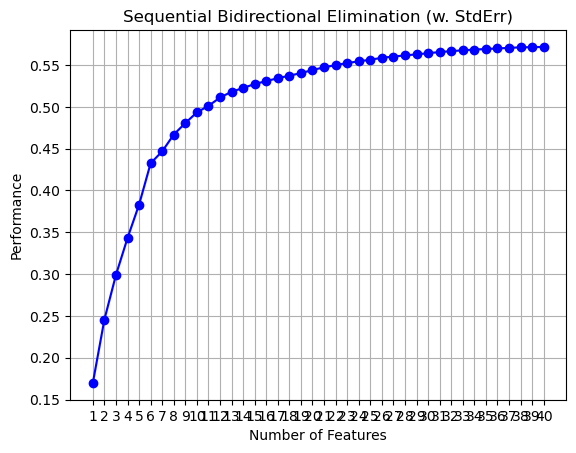

In [13]:
sffs = SFS(LinearRegression(),
         k_features=(1,40),
         forward=True,
         floating=True,
         cv=0)
sffs.fit(X, y)
sffs.k_feature_names_
fig1 = plot_sfs(sffs.get_metric_dict(), kind='std_dev')
plt.title('Sequential Bidirectional Elimination (w. StdErr)')
plt.grid()
plt.show()

In [14]:
df[list(sffs.k_feature_names_)].head()

,UUU,UUG,CUA,CUG,AUU,AUC,AUA,AUG,GUA,GCC,...,UGC,CAC,AAA,CGU,CGA,CGG,AGG,GAA,UAG,UGA
0,0.01654,0.00351,0.00100,0.013201,0.00551,0.02005,0.00752,0.02506,0.00902,0.05013,...,0.01153,0.02356,0.01053,0.00401,0.00401,0.00451,0.006101,0.01203,0.00050,0.00000
1,0.02714,0.00678,0.00204,0.013201,0.01153,0.02510,0.00882,0.03324,0.00814,0.04885,...,0.01628,0.01967,0.00543,0.00136,0.00136,0.00136,0.006101,0.01560,0.00068,0.00000
2,0.01974,0.01543,0.01028,0.011930,0.02283,0.01604,0.01316,0.02180,0.01213,0.01234,...,0.01234,0.01687,0.02077,0.00864,0.00926,0.00596,0.006101,0.02242,0.00000,0.00144
3,0.01775,0.00992,0.00940,0.017230,0.02402,0.02245,0.02507,0.02924,0.01723,0.00679,...,0.00888,0.00679,0.03133,0.00627,0.00261,0.00366,0.016710,0.03029,0.00157,0.00000
4,0.02816,0.03679,0.00473,0.020760,0.02716,0.00867,0.01310,0.02773,0.00920,0.00574,...,0.00705,0.00858,0.03408,0.00950,0.00578,0.00604,0.017340,0.03359,0.00044,0.00131


In [18]:
#adding the target to the list of features. 
new_features=np.append('Kingdom', list(sffs.k_feature_names_))
print("Selected Columns: {}".format(new_features))

Selected Columns: ['Kingdom' 'UUU' 'UUG' 'CUA' 'CUG' 'AUU' 'AUC' 'AUA' 'AUG' 'GUA' 'GCC'
 'GCA' 'CCU' 'CCC' 'CCA' 'GGU' 'GGC' 'GGA' 'UCU' 'UCC' 'UCA' 'UCG' 'AGU'
 'ACU' 'ACC' 'ACA' 'UAU' 'UAC' 'CAA' 'AAC' 'UGU' 'UGC' 'CAC' 'AAA' 'CGU'
 'CGA' 'CGG' 'AGG' 'GAA' 'UAG' 'UGA']


In [20]:
df_new = df[new_features]
print(df_new.head())

   Kingdom      UUU      UUG      CUA       CUG      AUU      AUC      AUA  \
0        9  0.01654  0.00351  0.00100  0.013201  0.00551  0.02005  0.00752   
1        9  0.02714  0.00678  0.00204  0.013201  0.01153  0.02510  0.00882   
2        9  0.01974  0.01543  0.01028  0.011930  0.02283  0.01604  0.01316   
3        9  0.01775  0.00992  0.00940  0.017230  0.02402  0.02245  0.02507   
4        9  0.02816  0.03679  0.00473  0.020760  0.02716  0.00867  0.01310   

       AUG      GUA  ...      UGC      CAC      AAA      CGU      CGA  \
0  0.02506  0.00902  ...  0.01153  0.02356  0.01053  0.00401  0.00401   
1  0.03324  0.00814  ...  0.01628  0.01967  0.00543  0.00136  0.00136   
2  0.02180  0.01213  ...  0.01234  0.01687  0.02077  0.00864  0.00926   
3  0.02924  0.01723  ...  0.00888  0.00679  0.03133  0.00627  0.00261   
4  0.02773  0.00920  ...  0.00705  0.00858  0.03408  0.00950  0.00578   

       CGG       AGG      GAA      UAG      UGA  
0  0.00451  0.006101  0.01203  0.00050  0.

In [22]:
#exporting bi directional elimination of features data from df to a CSV file
df_new.to_csv('Group_1_Bi_Directional_Elimination_Data.csv', index=False)

### Conclusion:

Initially we selected about that 23 features in bi-direcPonal eliminaPon but as it making the model underfit
the data so we decided to eliminate only 6 features in this step and go with 40 features.